# Pymaceuticals Inc.
---

### Analysis

In summary, the analysis reveals promising results for the Capomulin drug regimen in reducing tumor growth. It demonstrates the highest number of mice completing the study, except for Remicane. However, other regimens experienced mouse deaths during the study period.

Furthermore, there is a significant correlation observed between mouse weight and tumor volume. This suggests that the weight of the mouse might play a role in the effectiveness of any drug regimen in reducing tumor size.

Regarding the specific drug regimens, an outlier was identified within the Infubinol regimen. While most mice exhibited an increase in tumor volume, one mouse displayed a reduction in tumor growth during the study. This outlier could potentially indicate a positive response to the Infubinol treatment.

Overall, these findings emphasize the potential of the Capomulin regimen and highlight the importance of considering mouse weight as a factor in evaluating the effectiveness of different drug regimens. Additionally, the outlier in the Infubinol regimen warrants further investigation to better understand its unique response to the treatment.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_len = len(mouse_study_df["Mouse ID"].unique())

mouse_len

249

In [3]:
# Getting the duplicate mice by ID number that shows up for mouse ID and Timepoint
duplicate_mouse_ids = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_df[mouse_study_df["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_len = len(clean_df["Mouse ID"].unique())

clean_mouse_len

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of 
# mean, 
# median, 
# variance, 
# standard deviation, 
# and SEM 
# of the tumor volume for each regimen

# This method produces everything in a single groupby function


# Step 1 create 'mean_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].mean
mean_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

# Step 2 create 'median_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].median
median_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# Step 3 create 'var_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].var
var_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# Step 4 create 'STD_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].STD
std_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Step 5 create 'sem_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].SEM
sem_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_data = pd.DataFrame({"Tumor Volume Mean":mean_regimen, "Tumor Volume Median":median_regimen, "Tumor Volume Var":var_regimen, "Tumor Volume STD":std_regimen, "Tumor Volume SEM":sem_regimen})

summary_data

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Var,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


# Step 1 Create Groupby ("Drug Regimen")
regimen_type = clean_df.groupby("Drug Regimen")

# Step 2 Use Aggregate Functions using grouby from step 1 to get xxx for Tumor Volume
regimen_type["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

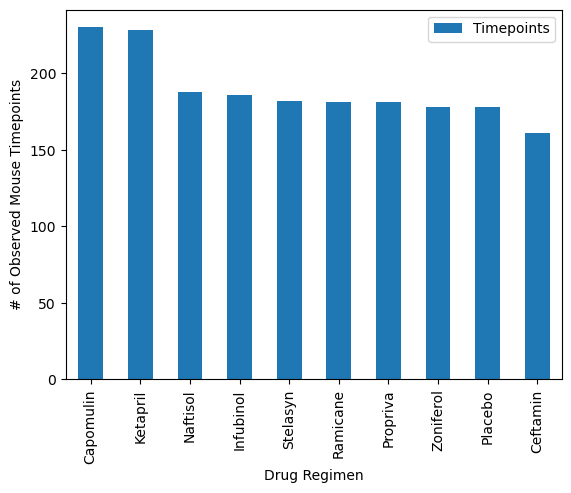

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


timepoints = mouse_study_df["Drug Regimen"].value_counts()
drug_name = mouse_study_df["Drug Regimen"].unique()
regimen_df = pd. DataFrame({"Timepoints": timepoints, "Drug Regimen": drug_name})
regimen_df = regimen_df.set_index("Drug Regimen")
bar_chart=regimen_df.plot(kind="bar", ylabel="# of Observed Mouse Timepoints", rot = 90)


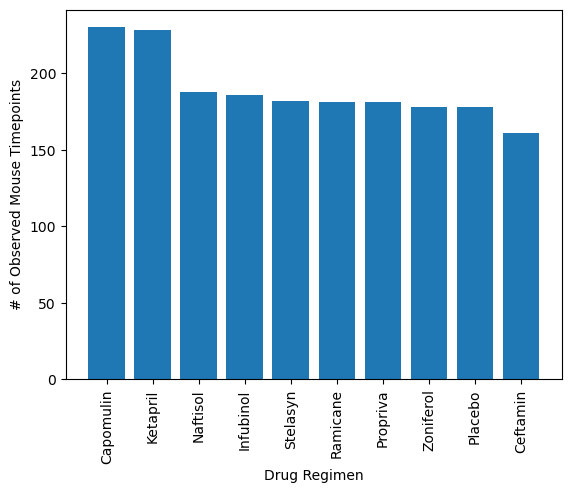

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints = mouse_study_df["Drug Regimen"].value_counts()
drug_name = mouse_study_df["Drug Regimen"].unique()
regimen_df = pd. DataFrame({"Timepoints": timepoints, "Drug Regimen": drug_name})
regimen_df = regimen_df.set_index("Drug Regimen")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.bar(drug_name, timepoints)
plt.show()

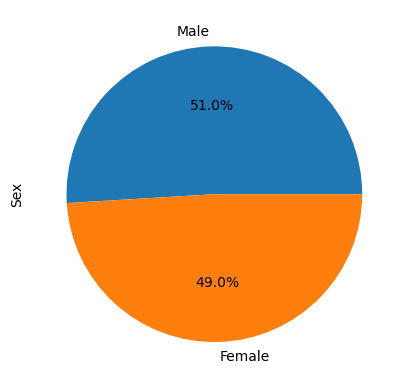

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex = clean_df["Sex"].value_counts()
sex_df = pd.DataFrame({"Sex":sex,})
pie = sex.plot(kind="pie", autopct="%1.1f%%", ylabel="Sex", rot=90)

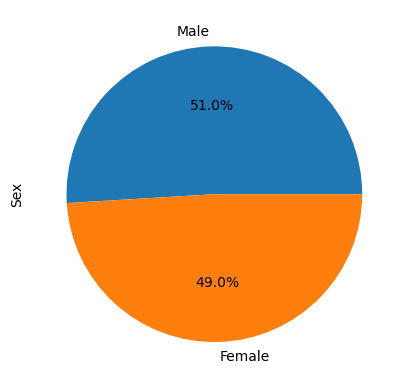

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_df["Sex"].value_counts()
labels = sex.index
sizes = sex.values

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

filt = clean_df["Timepoint"] == 45

vol_45 = clean_df[filt]
vol_45 

# Remove all other Drug_Regimens

#'Zoniferol', 'Stelasyn', 'Propriva', 'Naftisol', 'Ketapril'

vol_45.drop(vol_45.index[vol_45['Drug Regimen'] == 'Placebo'], inplace = True)
vol_45.drop(vol_45.index[vol_45['Drug Regimen'] == 'Zoniferol'], inplace = True)
vol_45.drop(vol_45.index[vol_45['Drug Regimen'] == 'Stelasyn'], inplace = True)
vol_45.drop(vol_45.index[vol_45['Drug Regimen'] == 'Propriva'], inplace = True)
vol_45.drop(vol_45.index[vol_45['Drug Regimen'] == 'Naftisol'], inplace = True)
vol_45.drop(vol_45.index[vol_45['Drug Regimen'] == 'Ketapril'], inplace = True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


#Extract only the two Columns needed
fnl_vol_45 = vol_45[["Drug Regimen", "Tumor Volume (mm3)", "Mouse ID", "Weight (g)"]]
fnl_vol_45


/var/folders/bs/8f4kmsh92sl0jczx7_y5fz5m0000gn/T/ipykernel_68074/2262518003.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol_45.drop(vol_45.index[vol_45['Drug Regimen'] == 'Placebo'], inplace = True)
/var/folders/bs/8f4kmsh92sl0jczx7_y5fz5m0000gn/T/ipykernel_68074/2262518003.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol_45.drop(vol_45.index[vol_45['Drug Regimen'] == 'Zoniferol'], inplace = True)
/var/folders/bs/8f4kmsh92sl0jczx7_y5fz5m0000gn/T/ipykernel_68074/2262518003.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

,Drug Regimen,Tumor Volume (mm3),Mouse ID,Weight (g)
1763,Ramicane,31.095335,n364,17
1764,Capomulin,38.982878,b128,22
1765,Ceftamin,59.851956,l661,26
1766,Ceftamin,64.729837,y865,26
1767,Ceftamin,68.594745,y769,27
...,...,...,...,...
1879,Ramicane,32.978522,a644,17
1885,Ramicane,33.562402,i177,18
1888,Capomulin,41.581521,r944,25
1889,Capomulin,31.023923,u364,17


In [14]:
fnl_vol_45_group = fnl_vol_45.groupby("Mouse ID")
fnl_vol_45_group

In [15]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Ramicane = fnl_vol_45.loc[fnl_vol_45["Drug Regimen"] == "Ramicane"]
Ramicane.head()

,Drug Regimen,Tumor Volume (mm3),Mouse ID,Weight (g)
1763,Ramicane,31.095335,n364,17
1773,Ramicane,38.407618,a411,22
1776,Ramicane,45.220869,q597,25
1780,Ramicane,36.374510,i334,20
1795,Ramicane,30.276232,s508,17


In [16]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin = fnl_vol_45.loc[fnl_vol_45["Drug Regimen"] == "Capomulin"]
Capomulin.head()

,Drug Regimen,Tumor Volume (mm3),Mouse ID,Weight (g)
1764,Capomulin,38.982878,b128,22
1769,Capomulin,34.455298,t565,17
1771,Capomulin,41.483008,l509,21
1777,Capomulin,37.074024,g288,19
1788,Capomulin,32.377357,r554,17


In [17]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Ceftamin = fnl_vol_45.loc[fnl_vol_45["Drug Regimen"] == "Ceftamin"]
Ceftamin.head()

,Drug Regimen,Tumor Volume (mm3),Mouse ID,Weight (g)
1765,Ceftamin,59.851956,l661,26
1766,Ceftamin,64.729837,y865,26
1767,Ceftamin,68.594745,y769,27
1772,Ceftamin,61.849023,j296,30
1790,Ceftamin,67.527482,w151,25


In [18]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Infubinol = fnl_vol_45.loc[fnl_vol_45["Drug Regimen"] == "Infubinol"]
Infubinol.head()

,Drug Regimen,Tumor Volume (mm3),Mouse ID,Weight (g)
1779,Infubinol,67.685569,y163,27
1781,Infubinol,72.226731,c139,28
1784,Infubinol,62.754451,z581,25
1786,Infubinol,65.525743,a251,25
1789,Infubinol,66.196912,k483,30


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
labels = ["Capomulin", "Infubinol", "Ceftamin", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Calculate the IQR and determine potential outliers for each drug regimen
for label in labels:
    drug_data = fnl_vol_45.loc[fnl_vol_45["Drug Regimen"] == label, "Tumor Volume (mm3)"]
    tumor_vol_data.append(drug_data)
    
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    

    

    # Locate the rows which contain mice on each drug and get the tumor volumes
    Ramicane = fnl_vol_45.loc[fnl_vol_45["Drug Regimen"] == "Ramicane"]
    Capomulin = fnl_vol_45.loc[fnl_vol_45["Drug Regimen"] == "Capomulin"]
    Ceftamin = fnl_vol_45.loc[fnl_vol_45["Drug Regimen"] == "Ceftamin"]
    Infubinol = fnl_vol_45.loc[fnl_vol_45["Drug Regimen"] == "Infubinol"]
    # add subset 

    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    print(f"Drug Regimen: {label}")
    print(f"IQR: {iqr}")
    print(f"Potential Outliers: {outliers}")
    print("---------------------")
    

Drug Regimen: Capomulin
IQR: 7.781863460000004
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------
Drug Regimen: Infubinol
IQR: 4.9311172099999965
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------
Drug Regimen: Ceftamin
IQR: 6.093590140000003
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------
Drug Regimen: Ramicane
IQR: 7.527130082500001
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------


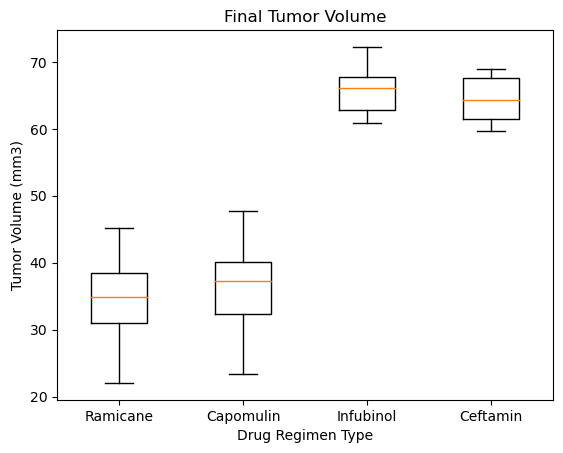

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]


plt.boxplot([Ramicane["Tumor Volume (mm3)"], Capomulin["Tumor Volume (mm3)"], Infubinol["Tumor Volume (mm3)"], Ceftamin["Tumor Volume (mm3)"]], labels=labels)
plt.title('Final Tumor Volume')
plt.xlabel('Drug Regimen Type')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [21]:
fnl_vol_45.describe()   

,Tumor Volume (mm3),Weight (g)
count,63.000000,63.000000
mean,45.803045,22.253968
std,14.836926,4.529360
min,22.050126,15.000000
25%,33.480027,17.500000
50%,40.159220,22.000000
75%,62.142214,26.000000
max,72.226731,30.000000


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# IQR = Q3 - Q1

q1 = fnl_vol_45["Tumor Volume (mm3)"].quantile(0.25)
q3 = fnl_vol_45["Tumor Volume (mm3)"].quantile(0.75)
iqr = q3 - q1
print(iqr)

28.66218635


In [23]:
# Determine outliers using upper and lower bounds
# lower_limit = Q1 - 1.5 * IQR
# upper_limit = Q3 - 1.5 * IQR

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 - 1.5 * iqr

print(lower_limit)
print(upper_limit)

-9.513252184999999
19.148934165


## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter to obtain single mouse data using Capomulin
s185 = clean_df.loc[clean_df["Mouse ID"] == "s185"]


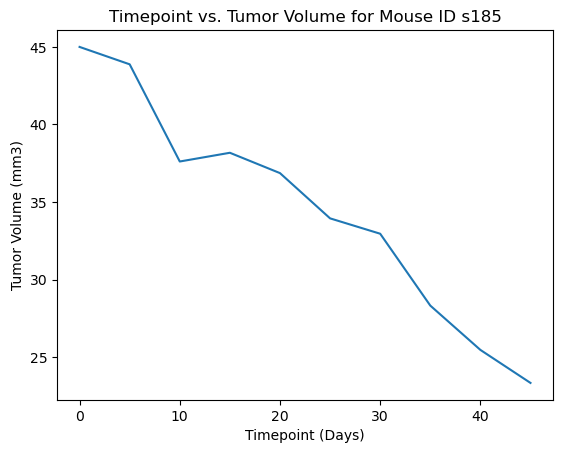

In [25]:
x = s185["Timepoint"]
y = s185["Tumor Volume (mm3)"]
plt.plot(x,y)
plt.title('Timepoint vs. Tumor Volume for Mouse ID s185')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

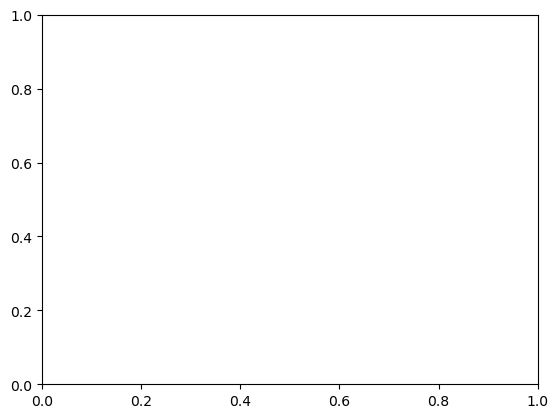

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Get average of Tumor Volume 
avg_vol = Capomulin["Tumor Volume (mm3)"].mean()
avg_vol

fnl_vol_45.columns

# Generate a scatter plot of mouse weight versus 
# average tumor volume for the Capomulin regimen
#x = Capomulin["Weight_g"].mean()
#y = avg_vol
#y = Capomulin["Tumor_Volume_mm3"]
weight = fnl_vol_45_group["Weight (g)"].mean()
tumor = fnl_vol_45_group["Tumor Volume (mm3)"].mean()
plt.scatter(weight,tumor, marker = 'o', facecolors = 'red', edgecolors = 'black', s = x, alpha = 0.75)
plt.title('s185 Mouse Weight vs. Avg. Tumor Volume per Capomulin Regimen')
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Vol. on Capomulin Regimen (mm3)')
plt.show

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


x_values = weight
y_values = tumor 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (17, 35), fontsize=15, color='black')
correlation = st.pearsonr(x_values, y_values)

plt.title("Mouse Weight and Avg Tumor Vol")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor Vol")
plt.show()